In [73]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shapely

In [2]:
# read in the data
fp = os.path.join("data", "arctic_communities.geojson")
df = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [3]:
# Explore the data
df.shape

(15, 4)

In [4]:
# Reproject crs
df = df.to_crs('epsg:3413')

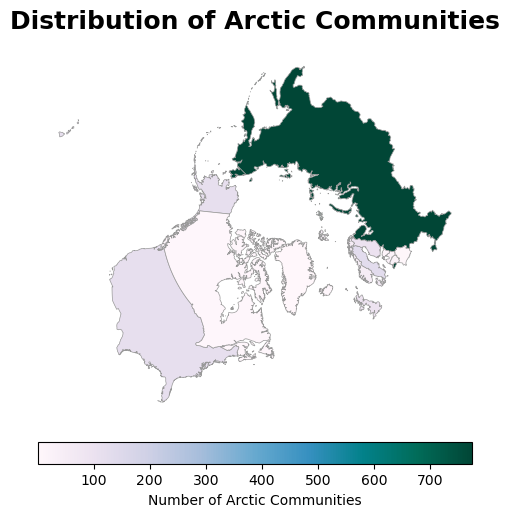

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
df.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()

In [6]:
# explore the geometry types
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

In [7]:
df = df.set_index('admin')

In [8]:
df.geom_type

admin
United States of America    MultiPolygon
United Kingdom              MultiPolygon
Sweden                      MultiPolygon
Russia                      MultiPolygon
Norway                      MultiPolygon
Lithuania                   MultiPolygon
Latvia                           Polygon
Iceland                          Polygon
Finland                     MultiPolygon
Estonia                     MultiPolygon
Greenland                   MultiPolygon
Faroe Islands               MultiPolygon
Denmark                     MultiPolygon
Canada                      MultiPolygon
Belarus                          Polygon
dtype: object

In [9]:
if df.geom_type.unique().size > 1:
    print(f"Multiple feature types {df.geom_type.unique()}")
else:
    print(f"All features are: {df.geom_type.unique()}")

Multiple feature types ['MultiPolygon' 'Polygon']


In [10]:
def check_polygons(df):
    if df.geom_type.unique().size > 1:
        print(f"Multiple feature types {df.geom_type.unique()}")
    else:
        print(f"All features are: {df.geom_type.unique()}")

In [11]:
check_polygons(df)

Multiple feature types ['MultiPolygon' 'Polygon']


In [12]:
# explode polygons to separate multipolygon
df = df.explode(index_parts = False).reset_index()

In [13]:
df.head()

,admin,country,n_communities,geometry
0,United States of America,US,115,"POLYGON ((-3725925.296 -146595.535, -3727676.3..."
1,United States of America,US,115,"POLYGON ((-3758791.596 -145719.927, -3759288.2..."
2,United States of America,US,115,"POLYGON ((-3528847.709 -42330.126, -3531749.22..."
3,United States of America,US,115,"POLYGON ((-3233070.801 576975.062, -3235532.75..."
4,United States of America,US,115,"POLYGON ((-3297700.143 555729.359, -3297892.33..."


In [14]:
check_polygons(df)

All features are: ['Polygon']


In [15]:
type(df.iloc[0])

pandas.core.series.Series

In [16]:
type(df.geometry.iloc[0])

shapely.geometry.polygon.Polygon

In [74]:
df.loc[0, 'geometry'].bounds[1]

-157978.48274500144

In [75]:
def min_y(row):
    y = row.geometry.bounds[1]
    return(y)

In [77]:
min_y(df.loc[0])

-157978.48274500144

In [78]:
df['miny'] = df.apply(func = min_y, axis = 1)

In [79]:
df

,admin,country,n_communities,geometry,miny
0,United States of America,US,115,"POLYGON ((-3725925.296 -146595.535, -3727676.3...",-1.579785e+05
1,United States of America,US,115,"POLYGON ((-3758791.596 -145719.927, -3759288.2...",-1.548083e+05
2,United States of America,US,115,"POLYGON ((-3528847.709 -42330.126, -3531749.22...",-4.233013e+04
3,United States of America,US,115,"POLYGON ((-3233070.801 576975.062, -3235532.75...",5.750318e+05
4,United States of America,US,115,"POLYGON ((-3297700.143 555729.359, -3297892.33...",5.330749e+05
...,...,...,...,...,...
476,Canada,CA,7,"POLYGON ((-2172496.999 -1051797.986, -2171487....",-1.066958e+06
477,Canada,CA,7,"POLYGON ((-2250394.448 -1142049.590, -2248665....",-1.156645e+06
478,Canada,CA,7,"POLYGON ((-2174506.546 -1045437.698, -2175524....",-1.045438e+06
479,Canada,CA,7,"POLYGON ((-2229596.170 157594.622, -2233555.75...",1.511054e+05


In [81]:
arctic_countries = df[df['miny'] >=40]

In [83]:
arctic_countries = arctic_countries.to_crs('epsg:3413')

<Axes: >

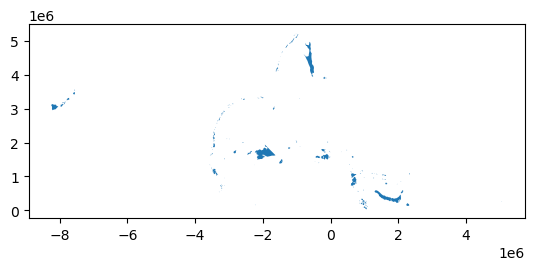

In [84]:
arctic_countries.plot()